In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container {width:80% !important; }</style>"))

In [2]:
import warnings
warnings.simplefilter(action='ignore')

In [3]:
import seaborn as sns
import matplotlib.mlab as ml
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import ticker
import matplotlib.ticker as plticker

def stdfigsize(scale=1, nx=1, ny=1, ratio=1.3):
    """
    Returns a tuple to be used as figure size.
    -------
    returns (7*ratio*scale*nx, 7.*scale*ny)
    By default: ratio=1.3
    If ratio<0 them ratio = golden ratio
    """
    if ratio < 0:
        ratio = 1.61803398875
    return((7*ratio*scale*nx, 7*scale*ny))

def stdrcparams(usetex=False):
    """
    Set several mpl.rcParams and sns.set_style for my taste.
    ----
    usetex = True
    ----
    """
    sns.set_style("white")
    sns.set_style({"xtick.direction": "in",
                 "ytick.direction": "in"})
    rcparams = {'text.usetex': usetex,
              'font.family': 'sans-serif',
              'font.sans-serif': ['Helvetica'],
             # 'text.latex.unicode': True,
              'text.latex.preamble': [r"\usepackage[T1]{fontenc}",
                                      r"\usepackage{lmodern}",
                                      r"\usepackage{amsmath}",
                                      r"\usepackage{mathptmx}"
                                      ],
              'axes.labelsize': 30,
              'axes.titlesize': 30,
              'ytick.right': 'on',
              'xtick.top': 'on',
              'xtick.labelsize': '25',
              'ytick.labelsize': '25',
              'axes.linewidth': 1.8,
              'xtick.major.width': 1.8,
              'xtick.minor.width': 1.8,
              'xtick.major.size': 14,
              'xtick.minor.size': 7,
              'xtick.major.pad': 10,
              'xtick.minor.pad': 10,
              'ytick.major.width': 1.8,
              'ytick.minor.width': 1.8,
              'ytick.major.size': 14,
              'ytick.minor.size': 7,
              'ytick.major.pad': 10,
              'ytick.minor.pad': 10,
              'axes.labelpad': 15,
              'axes.titlepad': 15,
              "xtick.direction": "in",
              "ytick.direction": "in",
              'legend.fontsize': 20}
    mpl.rcParams.update(rcparams) 

mpl.rcParams['lines.linewidth'] = 5
mpl.rcParams['lines.color'] = '#3690c0'

stdrcparams(usetex=True)
figsize=stdfigsize(ratio=-1)
xs,ys=figsize

def custom_frame(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x',length=10,direction='out')
    ax.tick_params(axis='x',which='minor',direction='out')
    ax.tick_params(axis='y',length=10,direction='out')
    ax.tick_params(axis='y',which='minor',direction='out')

In [4]:
import pickle
import itertools
import math
import random
import pandas as pd
import numpy as np
import networkx as nx

from datetime import date

In [5]:
data = pd.read_pickle('../results/us_air_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
# data['passenges_centrality'] = data['passenges_centrality'].astype(np.int64)
data = data[data.year>=date(2004,1,1)]
rename_dict = {}
for column in data.columns:
    if '_index' in column:
        column_v = column.replace('_index','',1)
    else:
        column_v =  column
    rename_dict[column]=column_v.replace('_',' ',3).title()
    
rename_again = {'Common Neighbor' : 'CN', 'Salton':'SA' , 'Jaccard':'JA', 'Sorensen':'SO', 'Hub Promoted':'HPI',
       'Hub Depressed':'HDI', 'Leicht Holme Newman':'LHNI', 'Preferential Attachment':'PA',
       'Adamic Adar':'AA', 'Resource Allocation':'RA', 'Local Path':'LP'}
    
data_air = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})

columns=['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
       'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
       'Adamic Adar', 'Resource Allocation', 'Local Path',
        'Year','Edge','Time','Label']

data_air =  data_air[columns]

In [6]:
data = pd.read_pickle('../results/brazil_bus_data_binary_removal.pkl').replace([np.inf, -np.inf], np.nan).dropna(how='all')
data_bus = data.rename(columns=rename_dict).rename(columns={'Prederential Attachment':'Preferential Attachment'})
data_bus =  data_bus[columns]

In [7]:
from sklearn.preprocessing import MinMaxScaler

var = ['Common Neighbor', 'Salton', 'Jaccard', 'Sorensen', 'Hub Promoted',
       'Hub Depressed', 'Leicht Holme Newman', 'Preferential Attachment',
       'Adamic Adar', 'Resource Allocation', 'Local Path']

# var = ['CN', 'SA', 'JA', 'SO', 'HPI',
#        'HDI', 'LHNI', 'PA',
#        'AA', 'RA', 'LP']

data_to_plot = data_air[data_air.Year==date(2014,1,1)]
scaler = MinMaxScaler()
X = data_to_plot[var] 
data_to_plot[var] = scaler.fit_transform(X)
df_air = pd.melt(data_to_plot,value_vars=var, id_vars='Label')

data_to_plot = data_bus[data_bus.Year==date(2014,1,1)]
scaler = MinMaxScaler()
X = data_to_plot[var] 
data_to_plot[var] = scaler.fit_transform(X)
df_bus = pd.melt(data_to_plot,value_vars=var, id_vars='Label')

import matplotlib.transforms
colors = ["black", "red"]

In [8]:
from scipy import stats

In [9]:
df=data_air[data_air.Year==date(2014,1,1)]
for v in var:
    rvs1=df[df.Label==0][v].values
    rvs2=df[df.Label==1][v].values
    print(stats.ks_2samp(rvs1, rvs2))

Ks_2sampResult(statistic=0.15666097482103503, pvalue=1.982313337523283e-27)
Ks_2sampResult(statistic=0.10862090429458393, pvalue=2.0861585092081924e-13)
Ks_2sampResult(statistic=0.09255294180415563, pvalue=7.515524672996184e-10)
Ks_2sampResult(statistic=0.09255294180415563, pvalue=7.515524672996184e-10)
Ks_2sampResult(statistic=0.24252510043807257, pvalue=3.838429696896629e-65)
Ks_2sampResult(statistic=0.05935596395125475, pvalue=0.0002658224172893095)
Ks_2sampResult(statistic=0.17744694046807058, pvalue=4.528766939612229e-35)
Ks_2sampResult(statistic=0.16116118159609305, pvalue=5.290253086393134e-29)
Ks_2sampResult(statistic=0.15825906672935464, pvalue=5.539006796102767e-28)
Ks_2sampResult(statistic=0.1984232744302038, pvalue=9.57054008135798e-44)
Ks_2sampResult(statistic=0.16244742014612767, pvalue=1.8428808791454444e-29)


In [10]:
0.0002658224172893095*22

0.0058480931803648085

In [11]:
df=data_bus[data_bus.Year==date(2014,1,1)]
for v in var:
    rvs1=df[df.Label==0][v].values
    rvs2=df[df.Label==1][v].values
    print(stats.ks_2samp(rvs1, rvs2))

Ks_2sampResult(statistic=0.12190597793329666, pvalue=3.703544641484614e-14)
Ks_2sampResult(statistic=0.3463746668207457, pvalue=2.7378217891616343e-111)
Ks_2sampResult(statistic=0.31181820853709286, pvalue=2.849817175335291e-90)
Ks_2sampResult(statistic=0.31181820853709286, pvalue=2.849817175335291e-90)
Ks_2sampResult(statistic=0.20125719156190075, pvalue=7.460519732932516e-38)
Ks_2sampResult(statistic=0.2767960062353032, pvalue=3.1898223685268866e-71)
Ks_2sampResult(statistic=0.28780731479174504, pvalue=5.739973564062357e-77)
Ks_2sampResult(statistic=0.12373917355290942, pvalue=1.4206991981815323e-14)
Ks_2sampResult(statistic=0.14974942114592504, pvalue=3.795301325394187e-21)
Ks_2sampResult(statistic=0.15400424073649788, pvalue=2.426523838587046e-22)
Ks_2sampResult(statistic=0.08584919713012179, pvalue=3.095151683189269e-07)


In [ ]:
3.095151683189269e-07*22

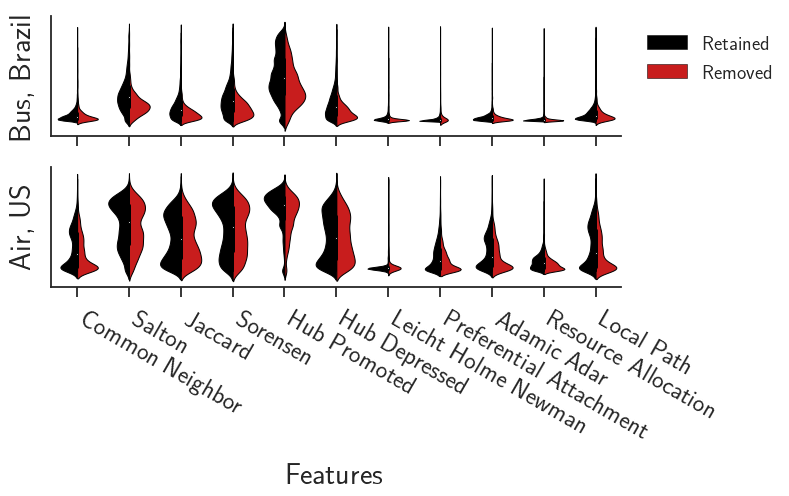

In [111]:
fig,ax = plt.subplots(2,1,sharex=True,figsize=(xs,ys))

g = sns.violinplot(x='variable', y='value', hue='Label', palette=sns.xkcd_palette(colors),split=True , data=df_bus,ax=ax[0],linewidth=1)
custom_frame(ax[0])
g = sns.violinplot(x='variable', y='value', hue='Label', palette=sns.xkcd_palette(colors),split=True , data=df_air,ax=ax[1],linewidth=1)
custom_frame(ax[1])
ax[0].set_xlabel('')
ax[1].set_xlabel("Features")
ax[0].set_ylabel('Bus, Brazil')
ax[1].set_ylabel('Air, US')
ax[0].set_yticks([])
ax[1].set_yticks([])
plt.xticks(rotation=-30,ha='left',ma='right')
# ax[0].legend(bbox_to_anchor=(1.0, 1))
legend = ax[0].legend(bbox_to_anchor=(1.3, 1),framealpha=0)
for t, l in zip(legend.texts,("Retained", "Removed")):
    t.set_text(l)
ax[1].get_legend().remove()
plt.tight_layout()
plt.savefig('../Figs/Fig.2B.pdf',transparent=True)

plt.show()